In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import re

# GLOBAL FIGURE SETTINGS

figsize = (3.5, 2.7)
fontsize = 11
linewidth = 2
markersize = 5
legend_fontsize = 9
labelspacing = 0

layer_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# set figure size
plt.rcParams['figure.figsize'] = figsize
# plt.rcParams['font.family'] = 'sans-serifX'
# plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams.update({'font.size': fontsize})
plt.rcParams['lines.linewidth'] = linewidth
plt.rcParams['lines.markersize'] = markersize
plt.rcParams['legend.fontsize'] = legend_fontsize


# Color gradient
# colors = cm.plasma(np.linspace(0, 1, len(dims)+1))
# colors = plt.get_cmap("tab10")(np.linspace(0, 1, len(dims)+1))
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2"]
colors = ['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3','#999999', '#e41a1c', '#dede00']

# get matplotlib v2 default colors
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# set labelspacing
plt.rcParams['legend.labelspacing'] = labelspacing

# activate grid
plt.rcParams['axes.grid'] = True

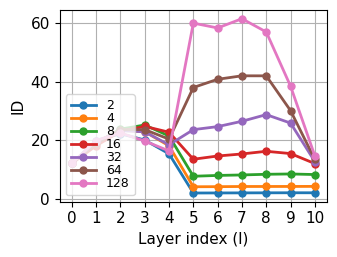

In [15]:
# Load the JSON data
with open("IDs_test.json") as f:
    data = json.load(f)

# Settings
epoch = 200
dims = [2, 4, 8, 16, 32, 64, 128]
layers = np.arange(11)  # Layer indices: 0 to 10

# Initialize the plot
plt.figure()

# Loop over latent dimensions and plot the data
for i, dim in enumerate(dims):
    dim_key = f"dim_{dim}"
    epoch_key = f"epoch_{epoch}"

    values = data[dim_key][epoch_key]
    plt.plot(layers, values, label=f"{dim}", marker='o')

plt.xlabel("Layer index (l)")
plt.ylabel("ID")
plt.xticks(ticks=layers, labels=[f"{i}" for i in layers])
plt.legend(loc='lower left')

# use a tight layout and specifically leave enough soace on the left
plt.tight_layout()

plt.savefig("IDs_over_layers.png", dpi=300)
plt.show()



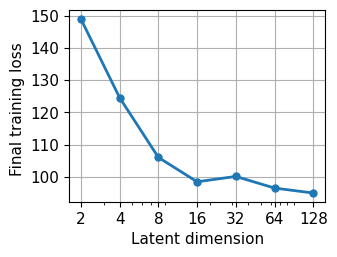

In [16]:
# Directory where loss files are stored
loss_dir = "loss"

# Dictionary to store loss values by dimension
losses = {}
rec_losses = {}
kl_losses = {}

# Pattern to extract dimension and epoch from filenames
pattern = re.compile(r"loss_epoch_200_dim_(\d+)\.txt")

# Loop through all files in the directory
for filename in os.listdir(loss_dir):
    # Match files that have epoch 200 and dimensions
    match = pattern.match(filename)
    if match:
        dim = int(match.group(1))  # Extract the dimension from filename
        file_path = os.path.join(loss_dir, filename)

        # Read the final loss value from the file (assuming the file contains a single loss value)
        with open(file_path, 'r') as f:
            line = f.readline()
            
            # line is formatted as [1493.0879334375,', '1487.83314828125,', '5.254785037841797] so we need to split it
            # and remove the square brackets
            
                    
            loss_value = float(line)
            
        # Store the loss value for the corresponding dimension
        losses[dim] = loss_value
        

# Sort losses by dimension
sorted_dims = sorted(losses.keys())
sorted_losses = [losses[dim] for dim in sorted_dims]

# Plot the loss over dimensions
plt.figure()
plt.plot(sorted_dims, sorted_losses, marker='o')
# plt.plot(sorted_dims, sorted_rec_losses)

plt.xlabel('Latent dimension')
plt.ylabel('Final training loss ')
plt.xscale('log')

# set xticks
plt.xticks(sorted_dims, labels=[f"{dim}" for dim in sorted_dims])

plt.tight_layout()
plt.savefig("loss_vs_dim.png", dpi=300)
plt.show()


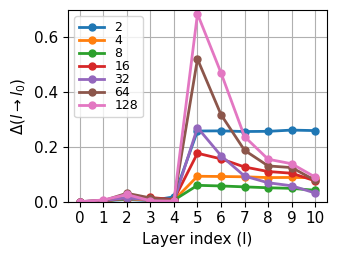

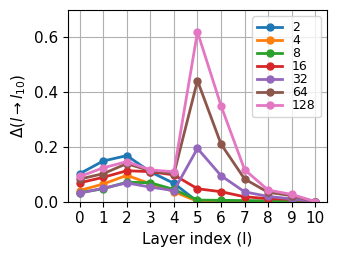

In [14]:
# Open the Information Imbalance (II) dictionary
with open("IIs.json", "r") as f:
    IIs = json.load(f)

# Define epoch and dimensions to plot
epoch = 200  # Plot for epoch 200
dims = [2, 4, 8, 16, 32, 64, 128]

plt.figure()
for i, dim in enumerate(dims):
    IIs_ = IIs[f"dim_{dim}_epoch_{epoch}"]
    layers = list(range(1, len(IIs_["to_first"]) + 1))
    plt.plot(layers, IIs_["to_first"], label=f"{dim}", linestyle='-', marker='o')
plt.xlabel("Layer index (l)")
plt.ylabel(r"$ \Delta(l \rightarrow l_0)$")
plt.legend(loc='upper left')
plt.xticks(layers, layer_indices)
plt.ylim(0, 0.7)
plt.tight_layout()
plt.savefig(f"II_all_dims_epoch_{epoch}_to_first.png")

plt.figure()
for i, dim in enumerate(dims):
    IIs_ = IIs[f"dim_{dim}_epoch_{epoch}"]
    layers = list(range(1, len(IIs_["to_last"]) + 1))
    plt.plot(layers, IIs_["to_last"], label=f"{dim}", linestyle='-', marker='o')
plt.xlabel("Layer index (l)")
plt.ylabel(r"$ \Delta(l \rightarrow l_{10})$")
plt.legend(loc='upper right')
plt.xticks(layers, layer_indices)
plt.ylim(0, 0.7)
plt.tight_layout()
plt.savefig(f"II_all_dims_epoch_{epoch}_to_last.png")

plt.show()


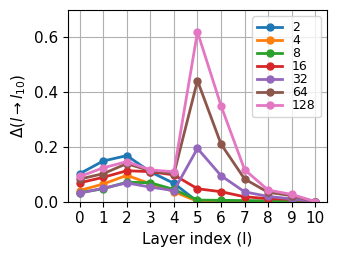

In [13]:
# Open the Information Imbalance (II) dictionary
with open("IIs.json", "r") as f:
    IIs = json.load(f)

# Define epoch and dimensions to plot
epoch = 200  # Plot for epoch 200
dims = [2, 4, 8, 16, 32, 64, 128]

# Select colors from the 'tab10' colormap (enough colors for dims)
# colors = cm.plasma(np.linspace(0, 1, len(dims)+1))

# Create the figure for plotting
plt.figure()

# Loop over each dimension to plot "to_first" curves on the same plot
for i, dim in enumerate(dims):
    # Get the II data for the specific dimension and epoch 200
    IIs_ = IIs[f"dim_{dim}_epoch_{epoch}"]
    
    # Ensure layers are the same length as IIs_["to_first"]
    layers = list(range(1, len(IIs_["to_last"]) + 1))
    
    # Plot "to_first" for this dimension
    plt.plot(layers, IIs_["to_last"], label=f"{dim}", color=colors[i], linestyle='-', marker='o')

# Set axis labels and log scale
plt.xlabel("Layer index (l)")
plt.ylabel(r"$ \Delta(l \rightarrow l_{10})$")
# plt.yscale("log")

# Add a title and legend for the dimensions
#plt.title(f"II (to_last) for different latent dimensions at Epoch {epoch}")
plt.legend(loc='upper right')

# set xticks
plt.ylim(0, 0.7)
plt.xticks(layers, layer_indices)

plt.tight_layout()
plt.savefig(f"II_all_dims_epoch_{epoch}_to_last.png")
plt.show()


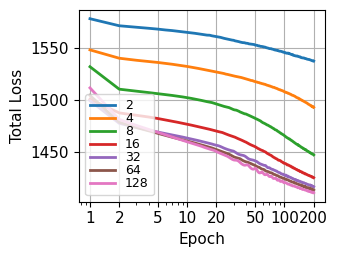

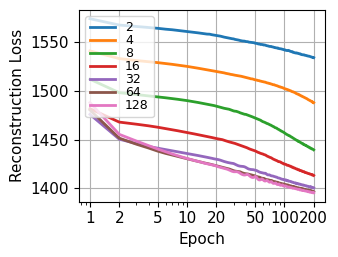

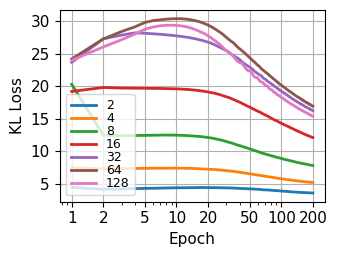

In [100]:

# Path to the folder containing the .txt files
folder_path = 'new_loss'

# Initialize a dictionary to store losses for each dimension
losses_by_dim = {2: [], 4: [], 8: [], 16: [], 32: [], 64: [], 128: []}

# Regular expression to match filenames like 'loss_epoch_(number)_dim_(number).txt'
file_pattern = re.compile(r'loss_epoch_(\d+)_dim_(\d+)\.txt')

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        match = file_pattern.match(filename)
        if match:
            epoch_ = int(match.group(1))
            dim = int(match.group(2))

            # Read the file content
            with open(os.path.join(folder_path, filename), 'r') as file:
                line = file.readline()
                # Extract the total loss, reconstructed loss, and KL loss from the first part of the line
                # Strip out everything between 'tensor(...)' and after.
                line = line.replace('[','').replace(']','').replace('\n','')
                line = line.split(',')

                total_loss = float(line[0])
                reconstructed_loss = float(line[1])
                kl_loss = float(line[2])

                # Append the losses to the respective dimension list
                losses_by_dim[dim].append((epoch_, total_loss, reconstructed_loss, kl_loss))

# Sort the losses by epoch for each dimension
for dim, losses in losses_by_dim.items():
    losses_by_dim[dim] = sorted(losses, key=lambda x: x[0])

# Plot Total Loss for all dimensions
plt.figure()
for dim, losses in losses_by_dim.items():
    epochs_ = [x[0] for x in losses]
    total_losses = [x[1] for x in losses]
    plt.plot(epochs_, total_losses, label=f'{dim}')
plt.xlabel('Epoch')
plt.ylabel('Total Loss')
plt.xscale('log')
plt.xticks(epochs_ticks, epochs_ticks)
plt.legend()
plt.tight_layout()  
plt.savefig('total_loss_curves.png', dpi=300)
plt.show()

# Plot Reconstructed Loss for all dimensions
plt.figure()
for dim, losses in losses_by_dim.items():
    epochs = [x[0] for x in losses]
    reconstructed_losses = [x[2] for x in losses]
    plt.plot(epochs, reconstructed_losses, label=f'{dim}')
plt.xlabel('Epoch')
plt.ylabel('Reconstruction Loss')
plt.xscale('log')
plt.xticks(epochs_ticks, epochs_ticks)
plt.legend()
plt.tight_layout()
plt.savefig('reconstrucion_loss_curves.png', dpi=300)
plt.show()

# Plot KL Loss for all dimensions
plt.figure()
for dim, losses in losses_by_dim.items():
    epochs = [x[0] for x in losses]
    kl_losses = [x[3] for x in losses]
    plt.plot(epochs, kl_losses, label=f'{dim}')
plt.xlabel('Epoch')
plt.ylabel('KL Loss')
plt.xscale('log')
plt.xticks(epochs_ticks, epochs_ticks)
plt.legend()
plt.tight_layout()
plt.savefig('kl_loss_curves.png', dpi=300)
plt.show()


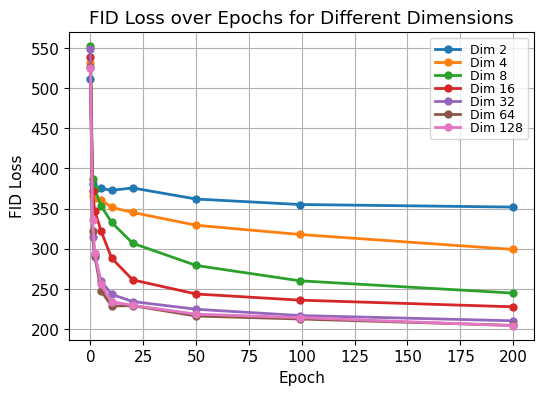

In [5]:
# Path to the folder containing the .txt files
folder_path = 'losses_fid_test'  # Update this to the correct folder path

# Define the dimensions and epochs you're interested in
dims = [2, 4, 8, 16, 32, 64, 128]
epochs = [0, 1, 2, 5, 10, 20, 50, 99, 200]

# Regular expression to match filenames like 'epoch_(number)_dim_(number)_fid_loss.txt'
file_pattern = re.compile(r'epoch_(\d+)_dim_(\d+)_fid_loss\.txt')

# Initialize a dictionary to store FID losses for each dimension
fid_losses_by_dim = {dim: [] for dim in dims}

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        match = file_pattern.match(filename)
        if match:
            epoch = int(match.group(1))
            dim = int(match.group(2))

            # Only process the dimensions and epochs we're interested in
            if dim in dims and epoch in epochs:
                # Read the file content (FID loss)
                with open(os.path.join(folder_path, filename), 'r') as file:
                    fid_loss = float(file.readline().strip())

                # Append the epoch and FID loss to the respective dimension list
                fid_losses_by_dim[dim].append((epoch, fid_loss))

# Sort the FID losses by epoch for each dimension
for dim in fid_losses_by_dim:
    fid_losses_by_dim[dim] = sorted(fid_losses_by_dim[dim], key=lambda x: x[0])

# Plot FID Loss for all dimensions over the specified epochs
plt.figure(figsize=(6, 4))
for dim, losses in fid_losses_by_dim.items():
    epochs_sorted = [x[0] for x in losses]
    fid_losses_sorted = [x[1] for x in losses]
    plt.plot(epochs_sorted, fid_losses_sorted, label=f'Dim {dim}', marker='o')

plt.title('FID Loss over Epochs for Different Dimensions')
plt.xlabel('Epoch')
plt.ylabel('FID Loss')
plt.legend()
plt.grid(True)
plt.show()


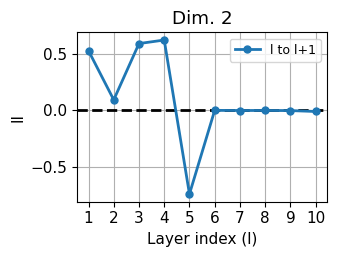

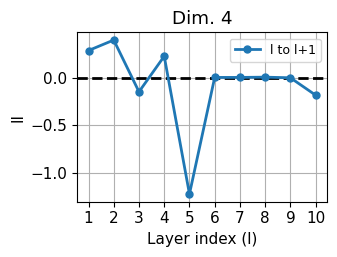

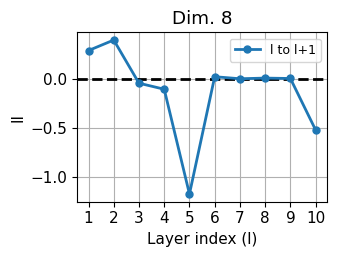

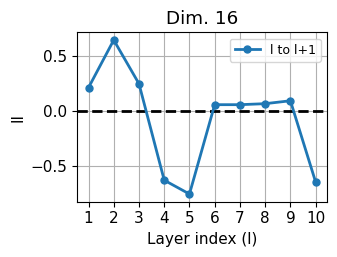

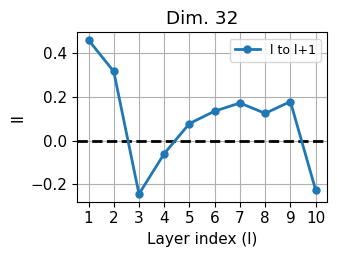

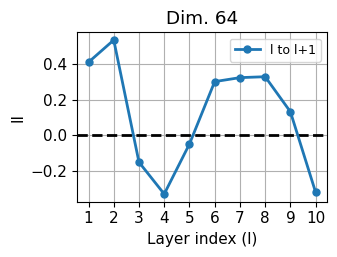

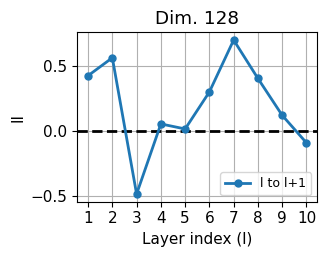

In [3]:
# Path to the single JSON file
json_file_path = 'IIs_train.json'

# Define the dimensions and the target epoch
dims = [2, 4, 8, 16, 32, 64, 128]
target_epoch = 200

# Initialize a dictionary to store the data
data = {}

# Load the JSON data from the file
with open(json_file_path, 'r') as f:
    json_data = json.load(f)
    
    # Loop through the keys and extract data for the target epoch and dimensions
    for key, values in json_data.items():
        key_parts = key.split('_')
        dim = int(key_parts[1])
        epoch = int(key_parts[3])
        
        # Filter for the target epoch
        if epoch == target_epoch and dim in dims:
            data[dim] = {
                'l1_to_l2': values['l1_to_l2'],
                'l2_to_l1': values['l2_to_l1']
            }

# Loop through each dimension and create a separate plot for each
for dim in dims:
    if dim in data:
        l_values = list(range(1, len(data[dim]['l1_to_l2']) + 1))
        
        # Create a figure for each dimension
        plt.figure()
        
        # Plot l1_to_l2 and l2_to_l1 on the same graph
        l1l2 = np.array(data[dim]['l1_to_l2'])
        l2l1 = np.array(data[dim]['l2_to_l1'])
        mean = (abs(l1l2) + abs(l2l1)) / 2
        
        # plt.plot(l_values, data[dim]['l1_to_l2'], label='l to l+1', marker = 'o')
        # plt.plot(l_values, data[dim]['l2_to_l1'], label='l+1 to l', marker = 'o')
        
        
        plt.axhline(0, color='black', linestyle='--')
        plt.plot(l_values, (l1l2 - l2l1)/mean, label='l to l+1', marker = 'o')
        # dashed line at zero 
        
        # Add title and labels
        plt.title(f'Dim. {dim}')
        plt.xlabel('Layer index (l)')
        # plt.yscale('log')
        plt.ylabel('II')
        
        plt.xticks(l_values, l_values)
        # Add legend and grid
        plt.legend()
        
        # Save the figure to a file
        plt.tight_layout()
        plt.savefig(f'imbalance_plot_dim_{dim}_epoch_{target_epoch}.png')
        plt.show()
        plt.close()  # Close the figure after saving
        

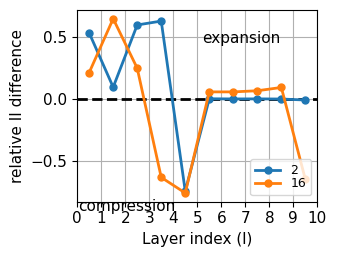

In [13]:
plt.figure()

dims = [32, 64, 128]
dims = [2,16]

plt.axhline(0, color='black', linestyle='--')

# Loop through each dimension and create a separate plot for each
for dim in dims:
    if dim in data:
        l_values = list(range(1, len(data[dim]['l1_to_l2']) + 1))
        l_values = np.array(l_values)
        # Plot l1_to_l2 and l2_to_l1 on the same graph
        l1l2 = np.array(data[dim]['l1_to_l2'])
        l2l1 = np.array(data[dim]['l2_to_l1'])
        mean = (abs(l1l2) + abs(l2l1)) / 2
        
        # plt.plot(l_values, data[dim]['l1_to_l2'], label='l to l+1', marker = 'o')
        # plt.plot(l_values, data[dim]['l2_to_l1'], label='l+1 to l', marker = 'o')
    
        plt.plot(l_values-0.5, (l1l2 - l2l1)/mean, label=f"{dim}", marker = 'o')
        
        
# annotate somewhere around zero and name it "expansion"
plt.annotate('expansion', xy=(8, 0.3), xytext=(5.2, .45))
# annotate somewhere around zero and name it "compression"
plt.annotate('compression', xy=(3, -0.3), xytext=(0.05, -0.9))
        
# Add title and labels
plt.xlabel('Layer index (l)')
# plt.yscale('log')
plt.ylabel('relative II difference')

plt.xticks(np.arange(0, 11), np.arange(0, 11))

# plot a legend on the side
plt.legend(loc='lower right')

# Save the figure to a file
plt.tight_layout()
plt.savefig(f'imbalance_plot_rel_diff.png', dpi = 300)
plt.show()
plt.close()  